In [1]:
import pandas as pd
import os

In [5]:
df = pd.read_csv("Datasets\dynamic_pricing.csv")

In [6]:
print(df.head())

   Number_of_Riders  Number_of_Drivers Location_Category  \
0                90                 45             Urban   
1                58                 39          Suburban   
2                42                 31             Rural   
3                89                 28             Rural   
4                78                 22             Rural   

  Customer_Loyalty_Status  Number_of_Past_Rides  Average_Ratings  \
0                  Silver                    13             4.47   
1                  Silver                    72             4.06   
2                  Silver                     0             3.99   
3                 Regular                    67             4.31   
4                 Regular                    74             3.77   

  Time_of_Booking Vehicle_Type  Expected_Ride_Duration  \
0           Night      Premium                      90   
1         Evening      Economy                      43   
2       Afternoon      Premium                      76  

### Goal: To identify the most important features for predicting the Historical_Cost_of_Ride.

In [9]:
# check for missing values and data types
missing_vals = df.isnull().sum()
df_types=df.dtypes
missing_vals_report = pd.DataFrame({'Missing Values': missing_vals, 'Data Type': df_types})
print(missing_vals_report)

                         Missing Values Data Type
Number_of_Riders                      0     int64
Number_of_Drivers                     0     int64
Location_Category                     0    object
Customer_Loyalty_Status               0    object
Number_of_Past_Rides                  0     int64
Average_Ratings                       0   float64
Time_of_Booking                       0    object
Vehicle_Type                          0    object
Expected_Ride_Duration                0     int64
Historical_Cost_of_Ride               0   float64


The dataset does not contain any missing values, and the data types appear appropriate for each feature.

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

### Univariate Analysis

It will help us understand the distribution of each variable individually.

In [11]:
#style for the plots
sns.set_style("whitegrid")

#defined numerical and categorical columns
numerical_cols = ['Number_of_Riders', 'Number_of_Drivers', 'Number_of_Past_Rides', 
                  'Average_Ratings', 'Expected_Ride_Duration', 'Historical_Cost_of_Ride']
categorical_cols = ['Location_Category', 'Customer_Loyalty_Status', 'Time_of_Booking', 'Vehicle_Type']

#descriptive stats for numerical features
desc_stats = df[numerical_cols].describe()

       Number_of_Riders  Number_of_Drivers  Number_of_Past_Rides  \
count       1000.000000        1000.000000           1000.000000   
mean          60.372000          27.076000             50.031000   
std           23.701506          19.068346             29.313774   
min           20.000000           5.000000              0.000000   
25%           40.000000          11.000000             25.000000   
50%           60.000000          22.000000             51.000000   
75%           81.000000          38.000000             75.000000   
max          100.000000          89.000000            100.000000   

       Average_Ratings  Expected_Ride_Duration  Historical_Cost_of_Ride  
count      1000.000000              1000.00000              1000.000000  
mean          4.257220                99.58800               372.502623  
std           0.435781                49.16545               187.158756  
min           3.500000                10.00000                25.993449  
25%           3.8

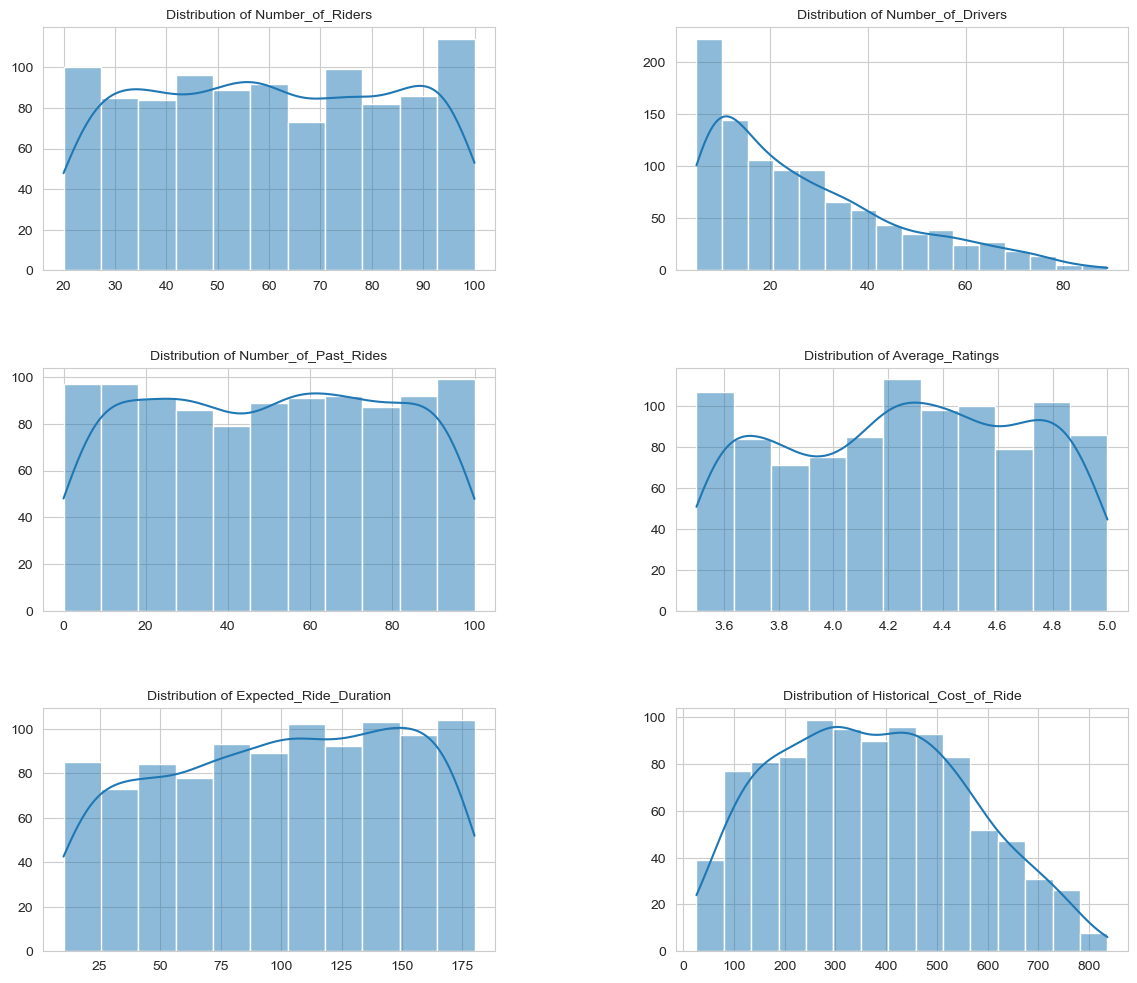

In [12]:
#plotting distributions for numerical features
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14,12))
fig.subplots_adjust(hspace=0.4,wspace=0.4)

for i, col in enumerate(numerical_cols):
    sns.histplot(df[col], kde=True, ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(f'Distribution of {col}',fontsize=10)
    axes[i//2, i%2].set_xlabel('')
    axes[i//2, i%2].set_ylabel('')
    
print(desc_stats)

The descriptive statistics and distributions for the numerical features provide the following insights:

1.    <b>Number_of_Riders:</b> The distribution is fairly uniform, with values ranging from 20 to 100 riders. It suggests a wide variation in the number of riders per ride.
2.    <b>Number_of_Drivers:</b> This feature also shows a wide range, but it is skewed towards lower numbers, indicating that there are often fewer drivers available compared to riders.
3.    <b>Number_of_Past_Rides:</b> The distribution of past rides is fairly even, though slightly skewed towards lower values. It indicates variability in customer experience with the service.
4.    <b>Average_Ratings:</b> The ratings are fairly normally distributed, with a mean around 4.26, indicating generally positive feedback from customers. The minimum rating is 3.5 and the maximum is 5.0.
5.    <b>Expected_Ride_Duration:</b> The expected ride duration varies significantly from 10 to 180 minutes, with a mean of approximately 99.59 minutes. The distribution is fairly uniform.
6.    <b>Historical_Cost_of_Ride:</b> The cost of rides varies widely, from about 26 to 836 units, with a mean of approximately 372.50 units. The distribution is right-skewed, indicating that most rides cost less than the mean, but there are some significantly more expensive rides.


Next, we will explore the categorical features to understand their distribution and how they might relate to the target variable. We will plot the counts of each category for the categorical features and note any observations:

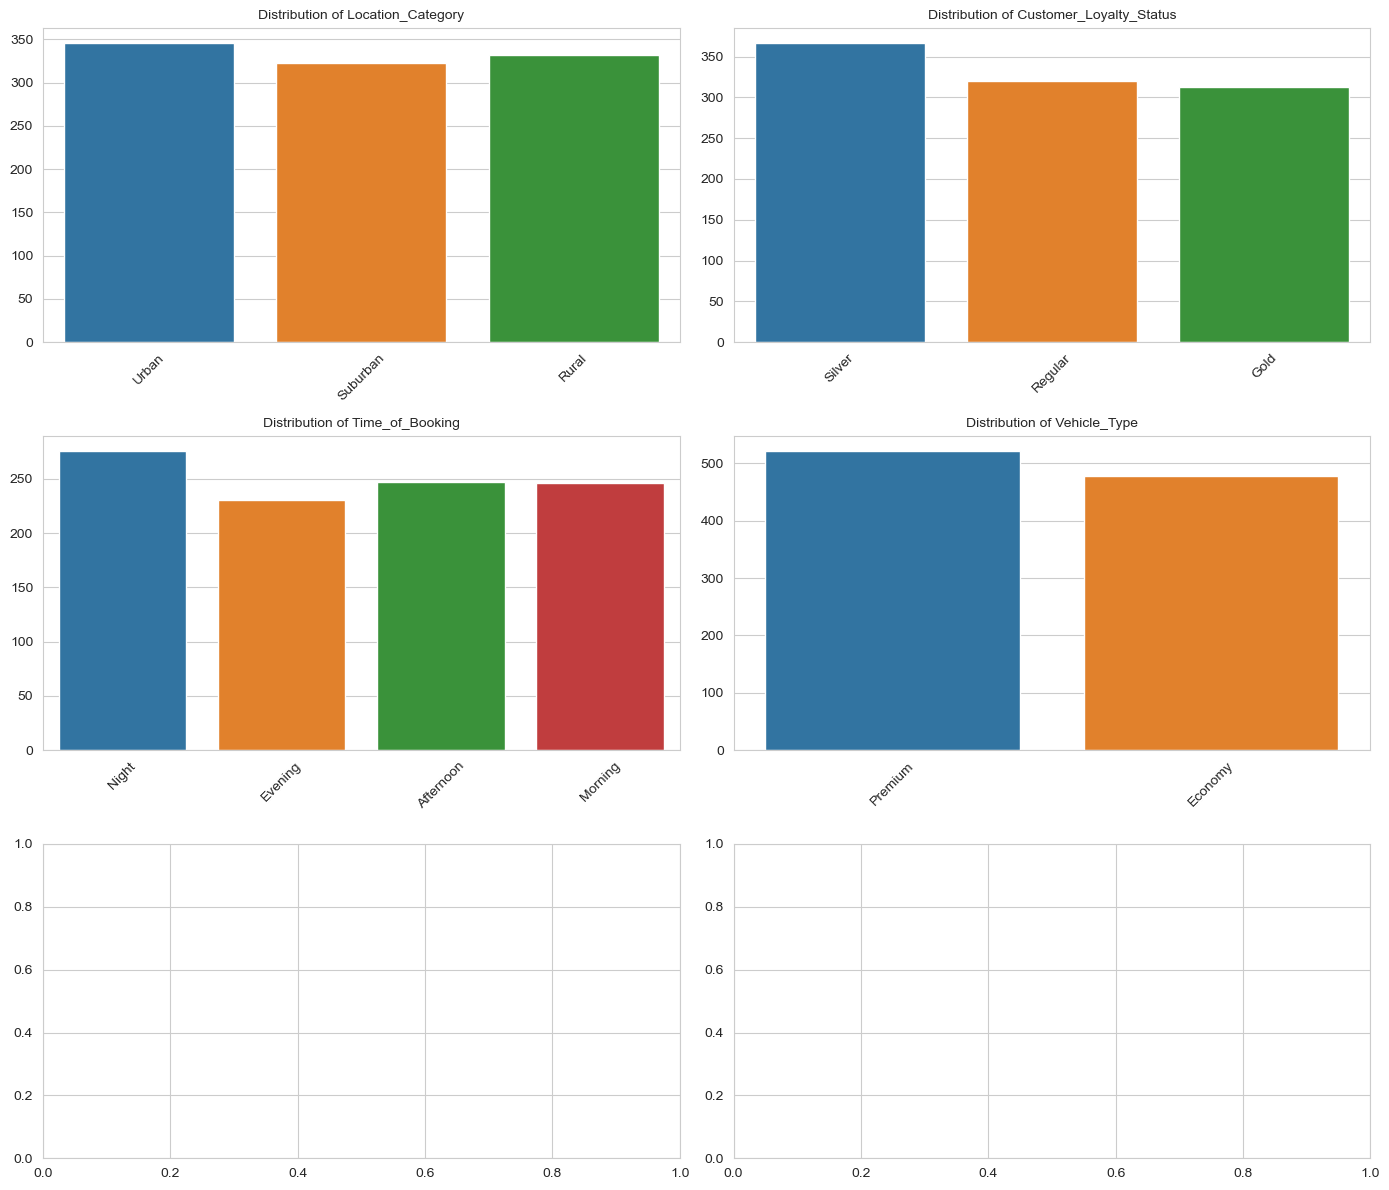

In [15]:
#plotting distributions for categorical features
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14,12))
fig.subplots_adjust(hspace=0.4,wspace=0.4)

for i, col in enumerate(categorical_cols):
    sns.countplot(data=df, x=col, ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(f'Distribution of {col}',fontsize=10)
    axes[i//2, i%2].set_xlabel('')
    axes[i//2, i%2].set_ylabel('')
    axes[i//2, i%2].tick_params(axis='x', rotation=45)

plt.tight_layout()

Here’s the Univariate Analysis Summary for Categorical Features:

1.    <b>Location_Category:</b> The distribution across different location categories shows a variation, with “Urban” likely being the most common, followed by “Suburban” and “Rural” categories. It suggests that the location category could impact the cost of rides, potentially due to differences in demand and availability.
2.    <b>Customer_Loyalty_Status:</b> There are varying levels of loyalty status among customers, including categories like “Silver”, “Regular”, and “Gold”. The distribution indicates a mix of new and loyal customers, which might influence ride costs through loyalty discounts or premium pricing.
3.    <b>Time_of_Booking:</b> The time of booking varies, including “Night”, “Evening”, “Afternoon”, and “Morning”. This feature could affect ride costs due to varying demand at different times of the day.
4.    <b>Vehicle_Type:</b> There’s a distribution across different vehicle types, such as “Premium” and “Economy”. The type of vehicle chosen for the ride likely impacts the cost directly, with premium vehicles costing more than economy options.

### Bivariate Analysis

After analyzing the distributions of numerical and categorical features, the next step is to perform Bivariate Analysis to explore the relationships between the target variable (Historical_Cost_of_Ride) and the other features. This analysis will help us identify which features have the most significant impact on ride cost, guiding our feature selection process for predictive modelling. Let’s proceed with this:

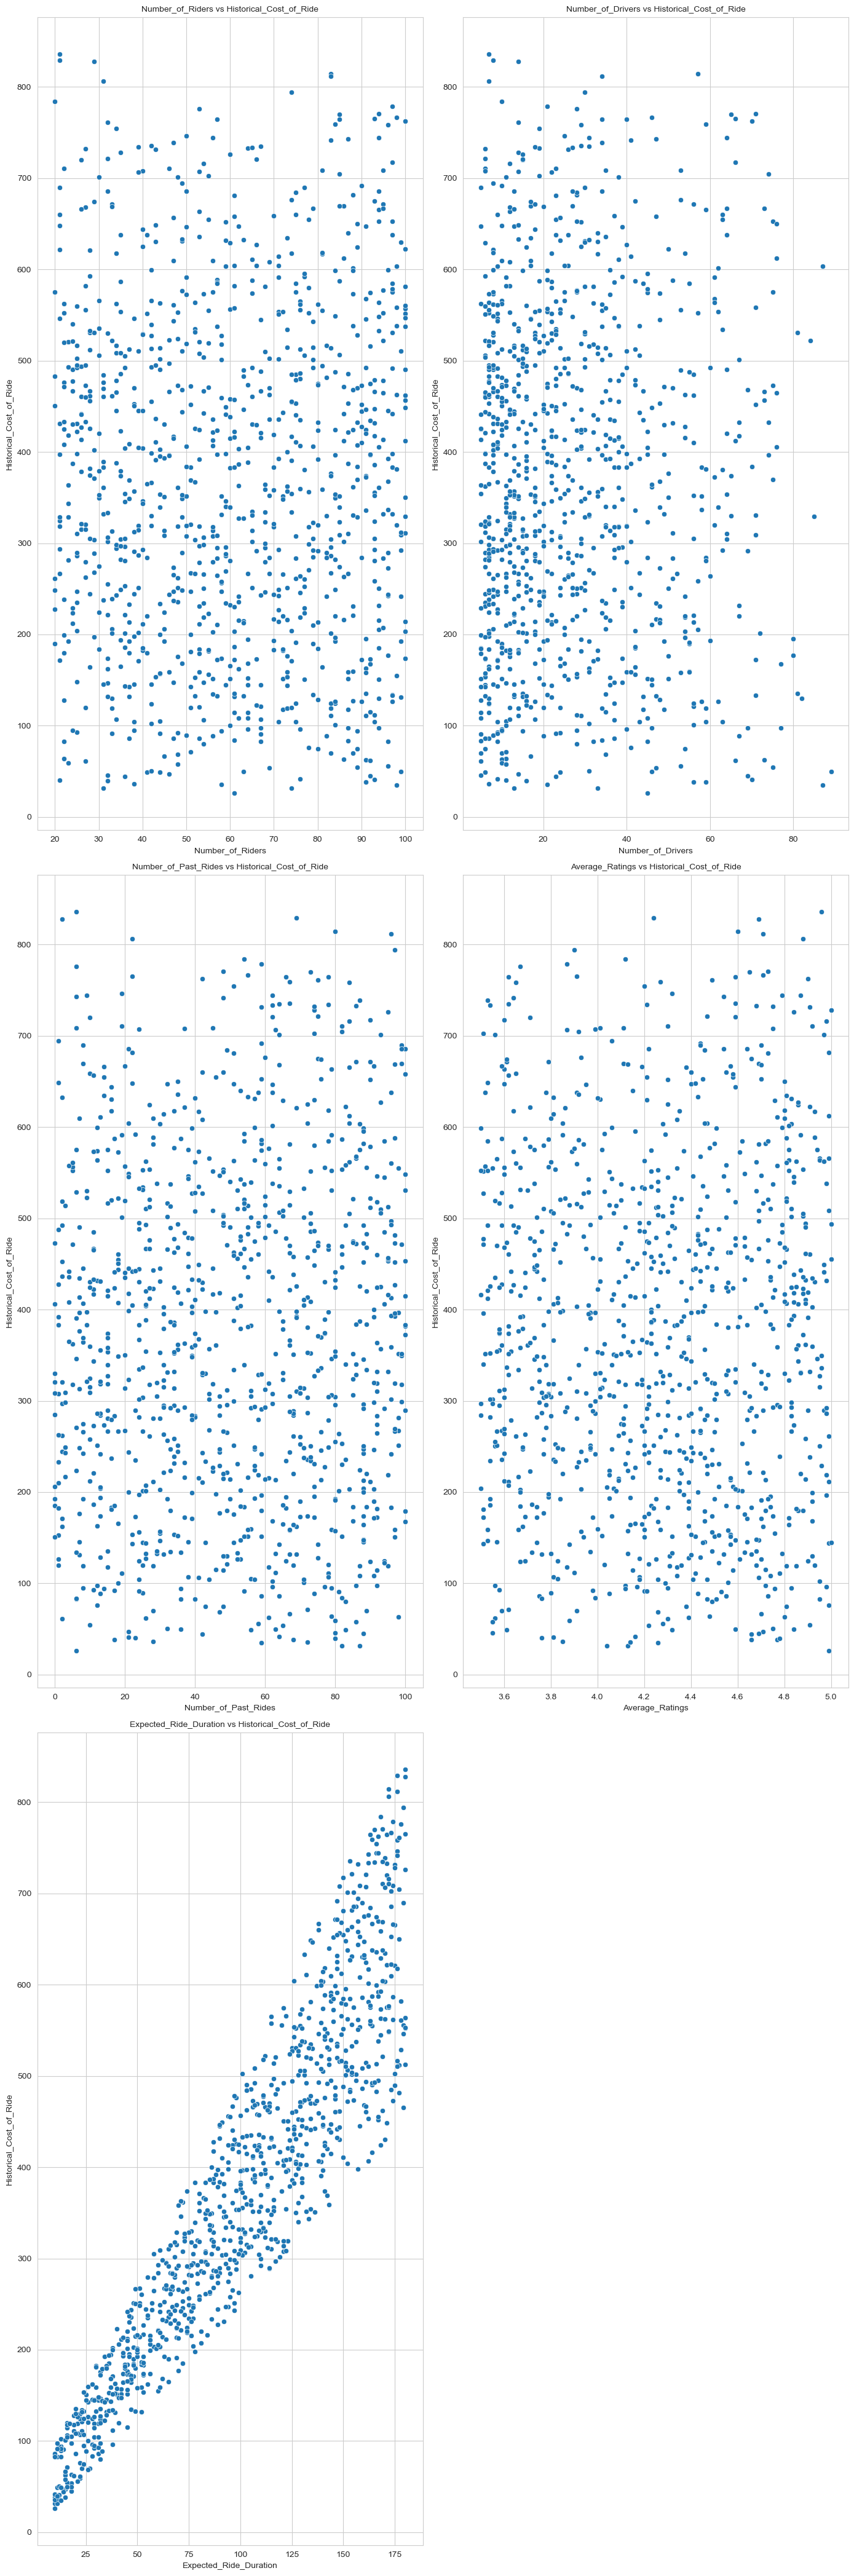

In [22]:
num_plots = len(numerical_cols[:-1])
n_cols = 2
n_rows = (num_plots+1)//n_cols

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(14, n_rows*14))

axes = axes.flatten()

#plot each numerical column against the historical cost.
for i, col in enumerate(numerical_cols[:-1]):
    sns.scatterplot(data=df, x=col, y='Historical_Cost_of_Ride', ax=axes[i])
    axes[i].set_title(f'{col} vs Historical_Cost_of_Ride', fontsize=10)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Historical_Cost_of_Ride')
    
for j in range(i+1, n_rows*n_cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

The scatter plots of numerical features against the Historical_Cost_of_Ride reveal several insights:

1.    <b>Number_of_Riders:</b> There does not appear to be a clear linear relationship between the number of riders and the cost of the ride. The distribution of points is quite scattered, suggesting that while the number of riders may influence the cost, it is not a straightforward linear relationship.
2.    <b>Number_of_Drivers:</b> Similar to the number of riders, the number of drivers available does not show a clear linear relationship with the ride cost. It indicates that while driver availability might affect pricing dynamics, it does not do so in a simple, direct manner.
3.    <b>Number_of_Past_Rides:</b> There’s no evident linear relationship between the number of past rides a customer has had and the cost of their rides. It suggests that customer loyalty, as measured by the number of past rides, does not directly influence the cost of rides linearly.
4.    <b>Average_Ratings:</b> The scatter plot does not indicate a strong linear relationship between average ratings and ride cost. While we might have expected higher-rated drivers or customers to be associated with higher costs, the data does not support this.
5.    <b>Expected_Ride_Duration:</b> There seems to be a more noticeable relationship here, with a potential trend indicating that longer expected ride durations are associated with higher costs. It is intuitive, as longer rides would naturally cost more.


Given these observations, Expected_Ride_Duration stands out as a numerical feature with a more discernible relationship to the Historical_Cost_of_Ride. The other numerical features do not show clear linear relationships with the ride cost, but they might still contribute information in combination with other features or through non-linear relationships.

Next, let’s examine how the categorical features relate to the Historical_Cost_of_Ride using box plots to explore the variance in ride costs across different categories. It will help identify if certain categories are consistently associated with higher or lower ride costs:

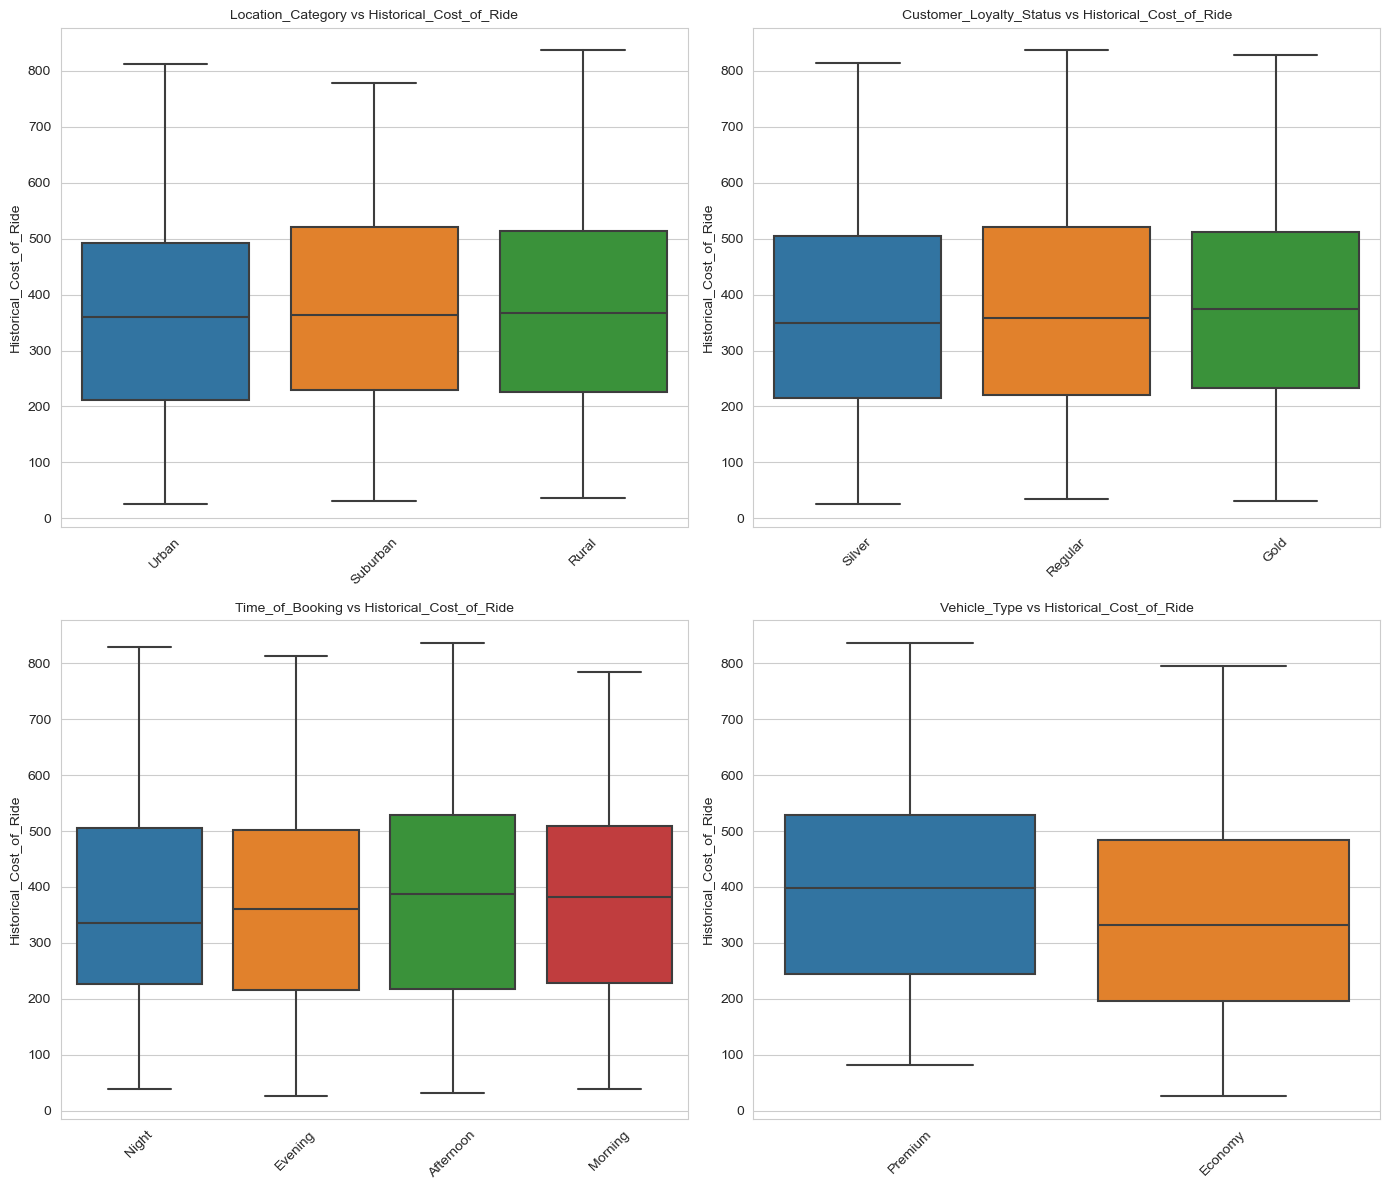

In [24]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14,12))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, col in enumerate(categorical_cols):
    sns.boxplot(data=df, x=col, y='Historical_Cost_of_Ride', ax=axes[i//2, i%2])
    axes[i//2,i%2].set_title(f'{col} vs Historical_Cost_of_Ride', fontsize=10)
    axes[i//2, i%2].set_xlabel('')
    axes[i//2, i%2].set_ylabel('Historical_Cost_of_Ride')
    axes[i//2, i%2].tick_params(axis='x', rotation=45)
    plt.tight_layout()

The box plots reveal how the Historical_Cost_of_Ride varies across different categories for each categorical feature:

1.    <b>Location_Category:</b> Ride costs vary significantly by location category, with “Urban” locations generally showing a wider range and potentially higher median costs compared to “Suburban” and “Rural” areas. It suggests that location plays a crucial role in determining ride costs, likely due to differences in demand, availability, and operational costs.
2.    <b>Customer_Loyalty_Status:</b> There are noticeable differences in ride costs based on the loyalty status of the customer. While the median costs across different statuses seem relatively close, the variability in costs suggests that loyalty status could influence pricing, possibly through loyalty discounts or perks for higher-status customers.
3.    <b>Time_of_Booking:</b> The time of booking appears to impact ride costs, with certain times of day showing different cost distributions. It could reflect demand variations throughout the day, with peak times potentially commanding higher prices.
4.    <b>Vehicle_Type:</b> As expected, the type of vehicle has a significant impact on the cost of rides. “Premium” vehicles generally have higher costs compared to “Economy” vehicles, indicating that vehicle type is a critical factor in pricing.

Insights Gathered from EDA for Feature Selection

Based on the EDA, the following features are identified as potentially important for predicting ride costs:

-    <b>Expected_Ride_Duration:</b> Shows a clear relationship with ride cost.
-    <b>Location_Category:</b> Significant variance in costs by location.
-    <b>Customer_Loyalty_Status:</b> Variability in costs suggests an impact on pricing.
-    <b>Time_of_Booking:</b> Variations in costs indicate an influence of demand at different times.
-    <b>Vehicle_Type:</b> Directly influences cost with clear distinctions between vehicle types.

The other numerical features (Number_of_Riders, Number_of_Drivers, Number_of_Past_Rides, Average_Ratings) do not show strong linear relationships with the target variable but could still be useful, especially when combined with other features or through engineered features that capture non-linear relationships or interactions.